# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing the dataset

In [2]:
car = pd.read_csv('CarPrice_Assignment.csv', index_col = 'car_ID')
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [3]:
car.shape

(205, 25)

In [4]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Exploring the continuous features of the dataset

In [5]:
num_col = car.select_dtypes(exclude = 'object').columns
num_col

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [6]:
car[num_col].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Checking for linear relationship between the features and target

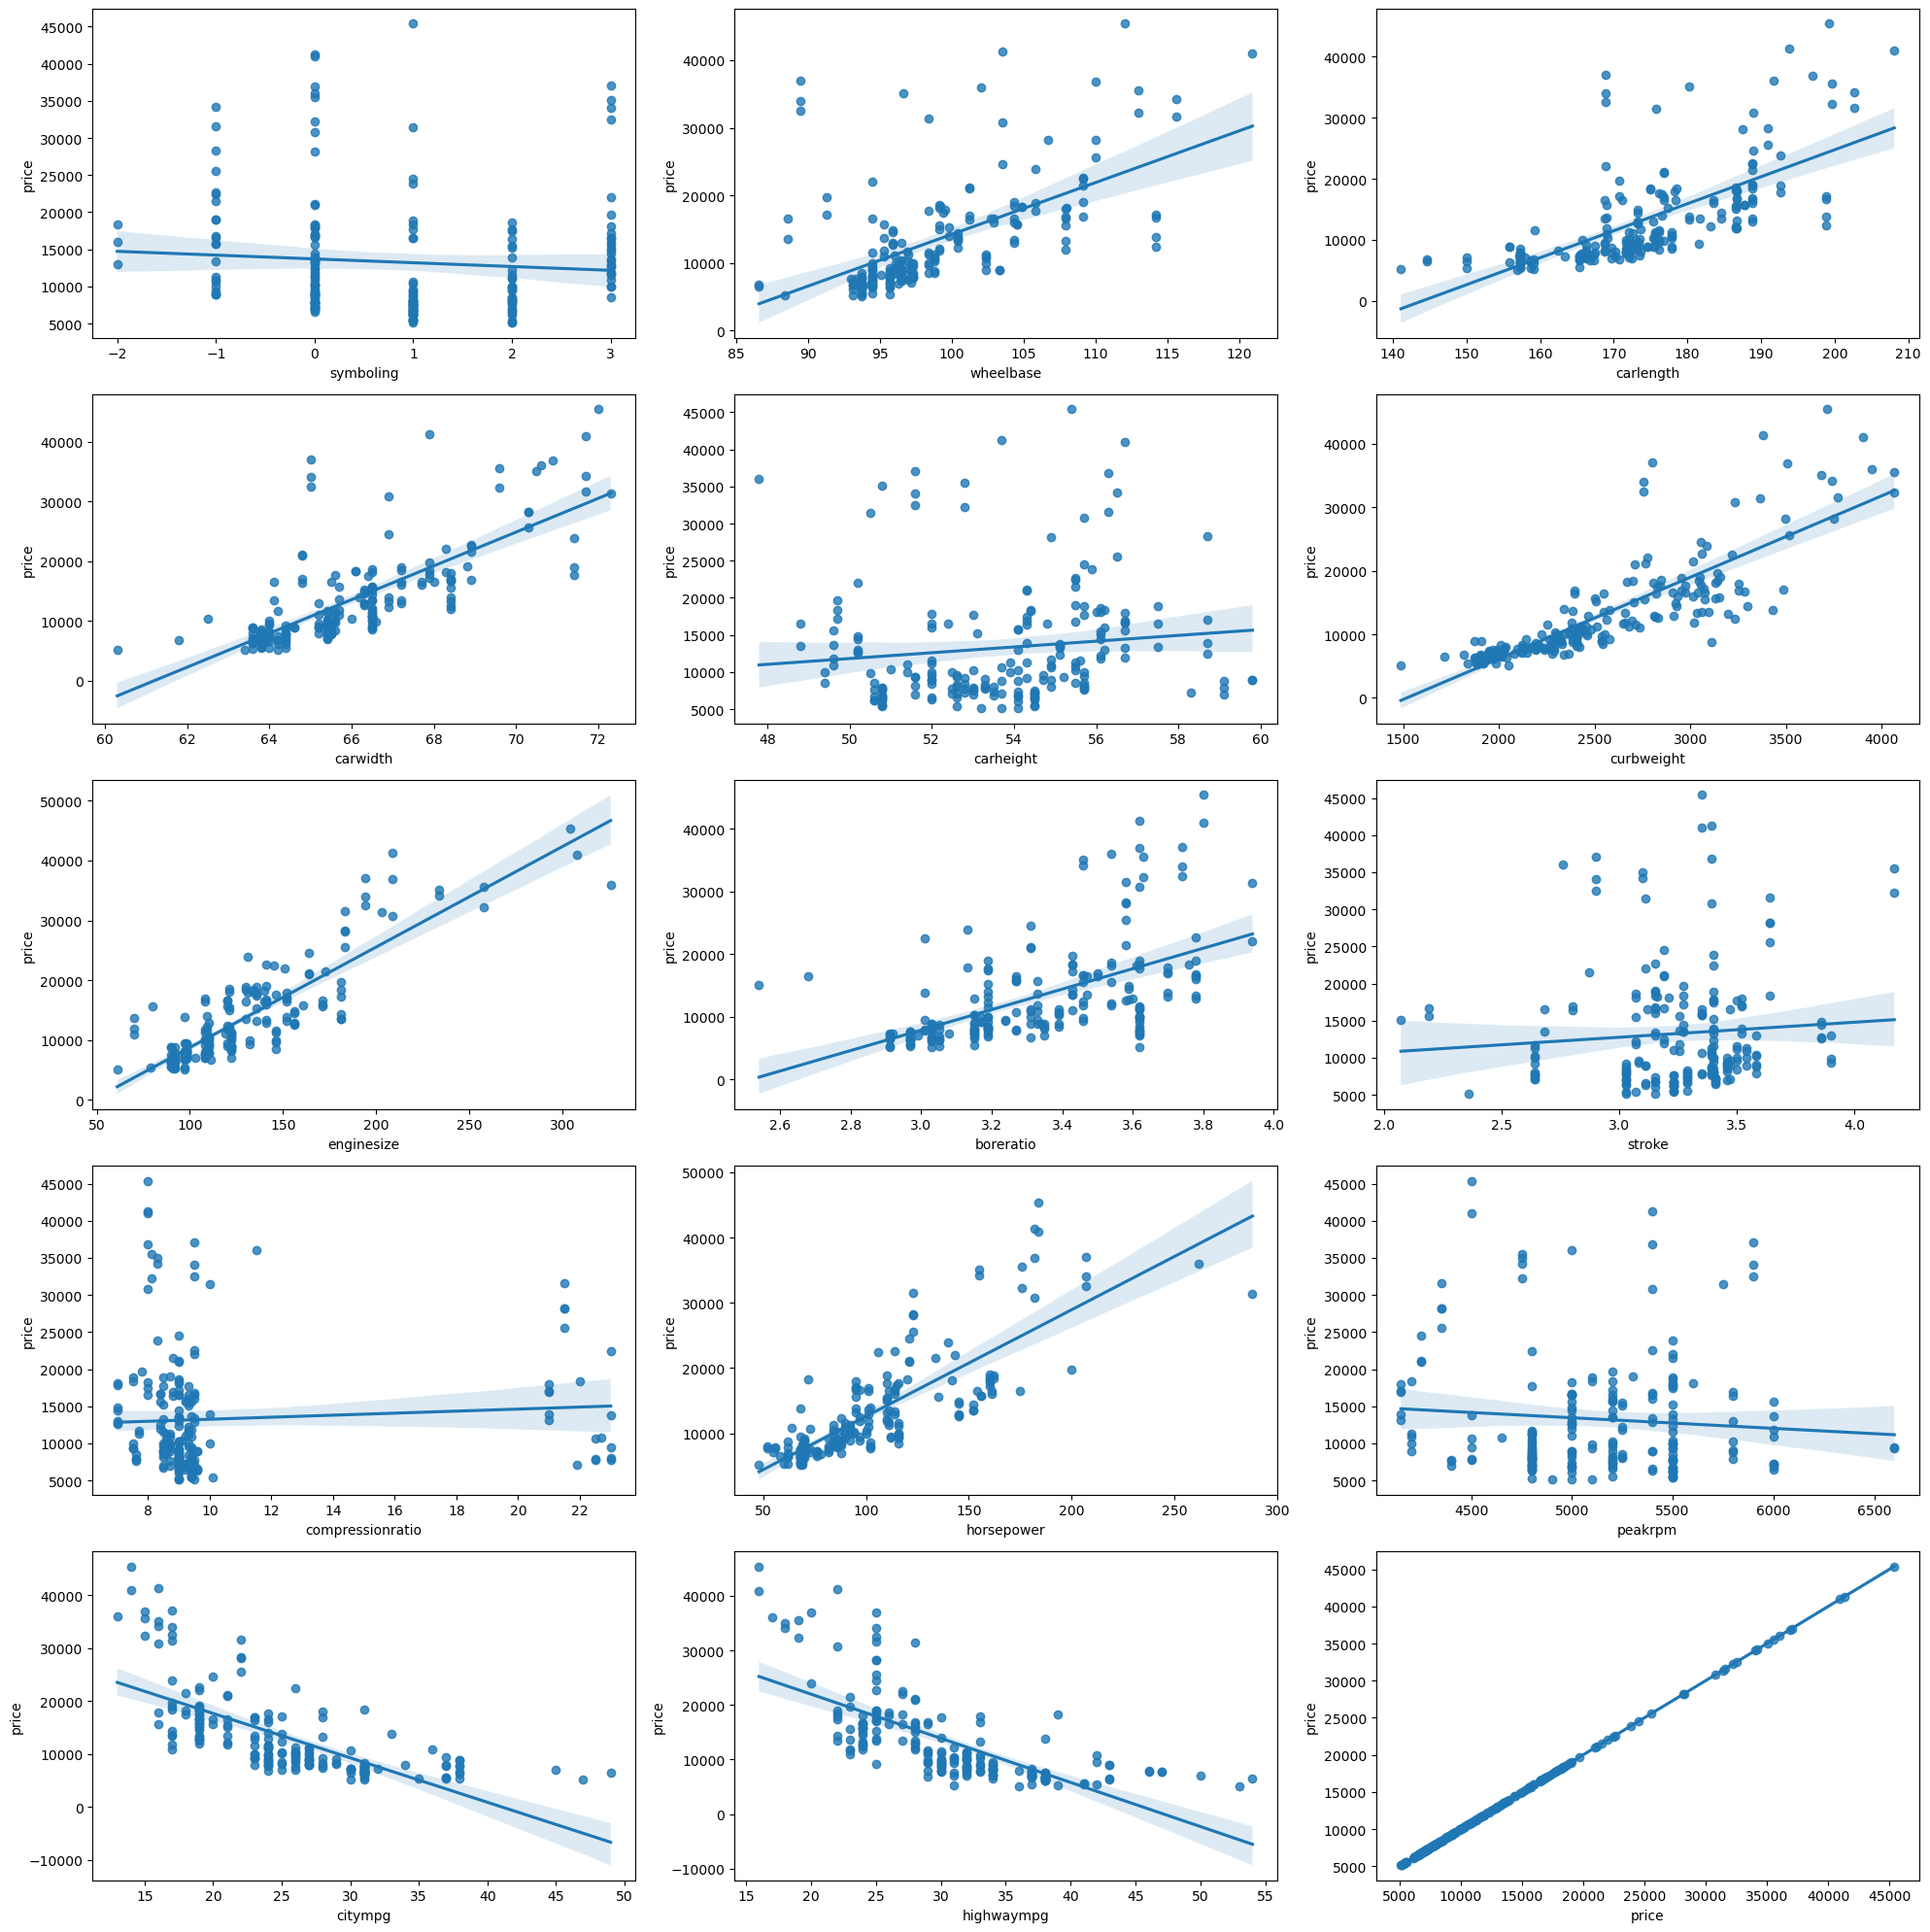

In [7]:
plt.figure(figsize=(20,20))
for i, j in enumerate(num_col):
    plt.subplot(5, 3, i+1)
    sns.regplot(x = j, y = 'price', data = car)
plt.tight_layout()

Looks like some features do not have a linear relationship with the target.

We look at a ***correlation heatmap*** to remove less significant features.

<Axes: >

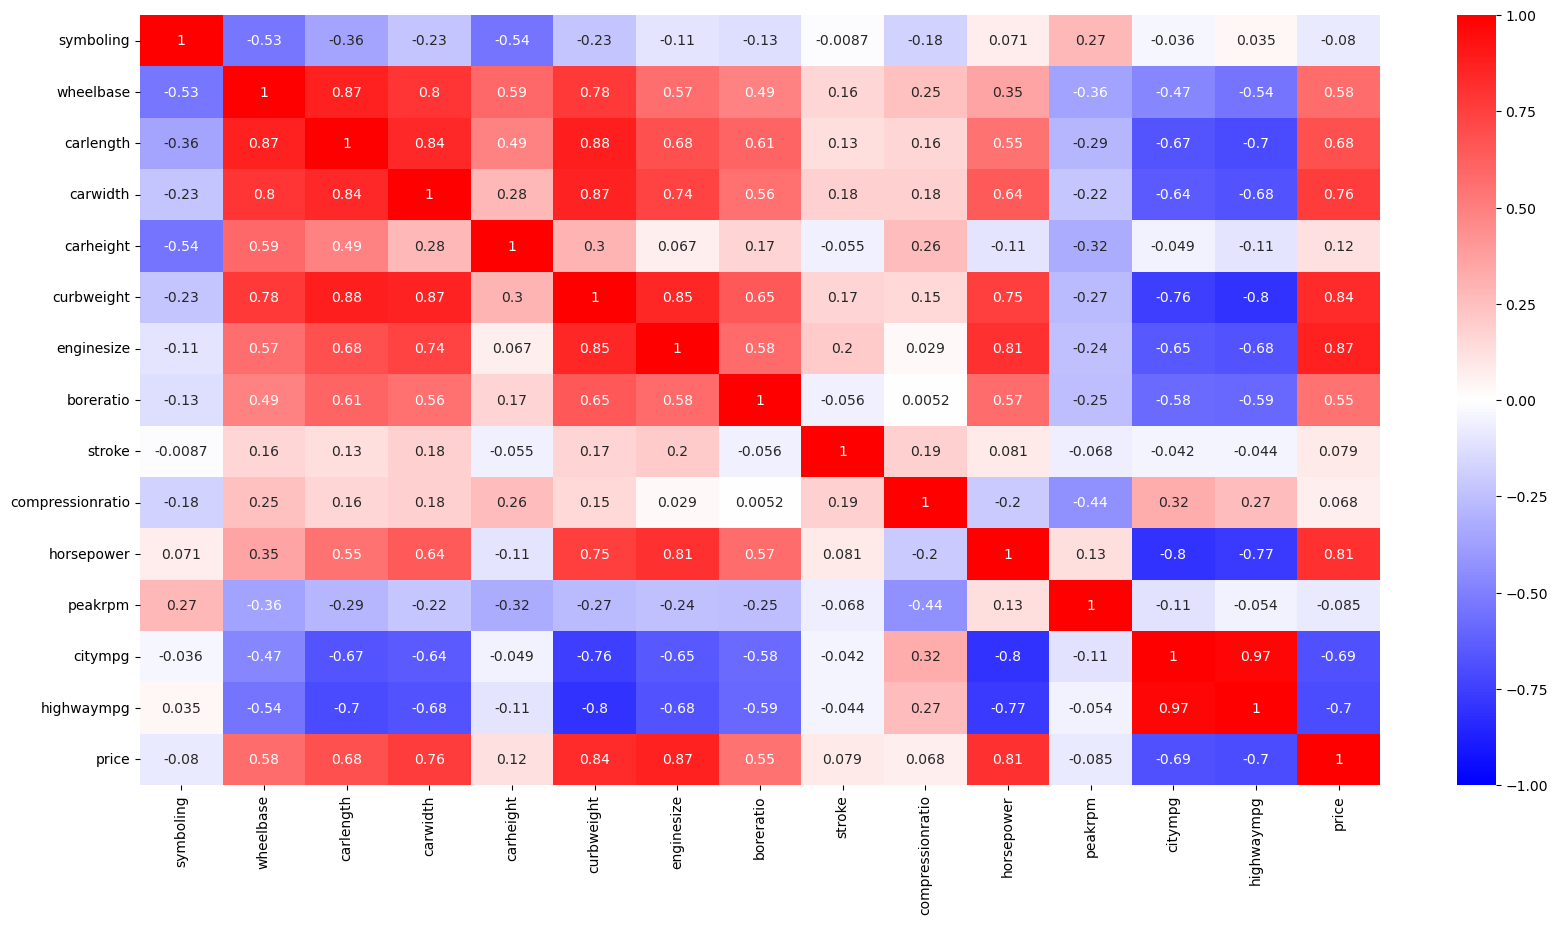

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(car[num_col].corr(), cmap = 'bwr', vmin = -1, annot = True)

We now drop features with the least correlation viz.
 > 1. symboling:       -0.2
 > 2. carheight:        0.12
 > 3. stroke:           0.079
 > 4. compressionratio: 0.068
 > 5. peakrpm:         -0.085
    
We can also remove *CarName* as it is insignificant.

In [9]:
car.drop(columns = ['symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm', 'CarName'], axis = 1, 
         inplace = True)
car.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
2,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
3,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
4,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
5,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


# Exploring the categorical features of the dataset

In [10]:
cat_col = car.select_dtypes(include = ['object']).columns
car[cat_col].nunique()

fueltype          2
aspiration        2
doornumber        2
carbody           5
drivewheel        3
enginelocation    2
enginetype        7
cylindernumber    7
fuelsystem        8
dtype: int64

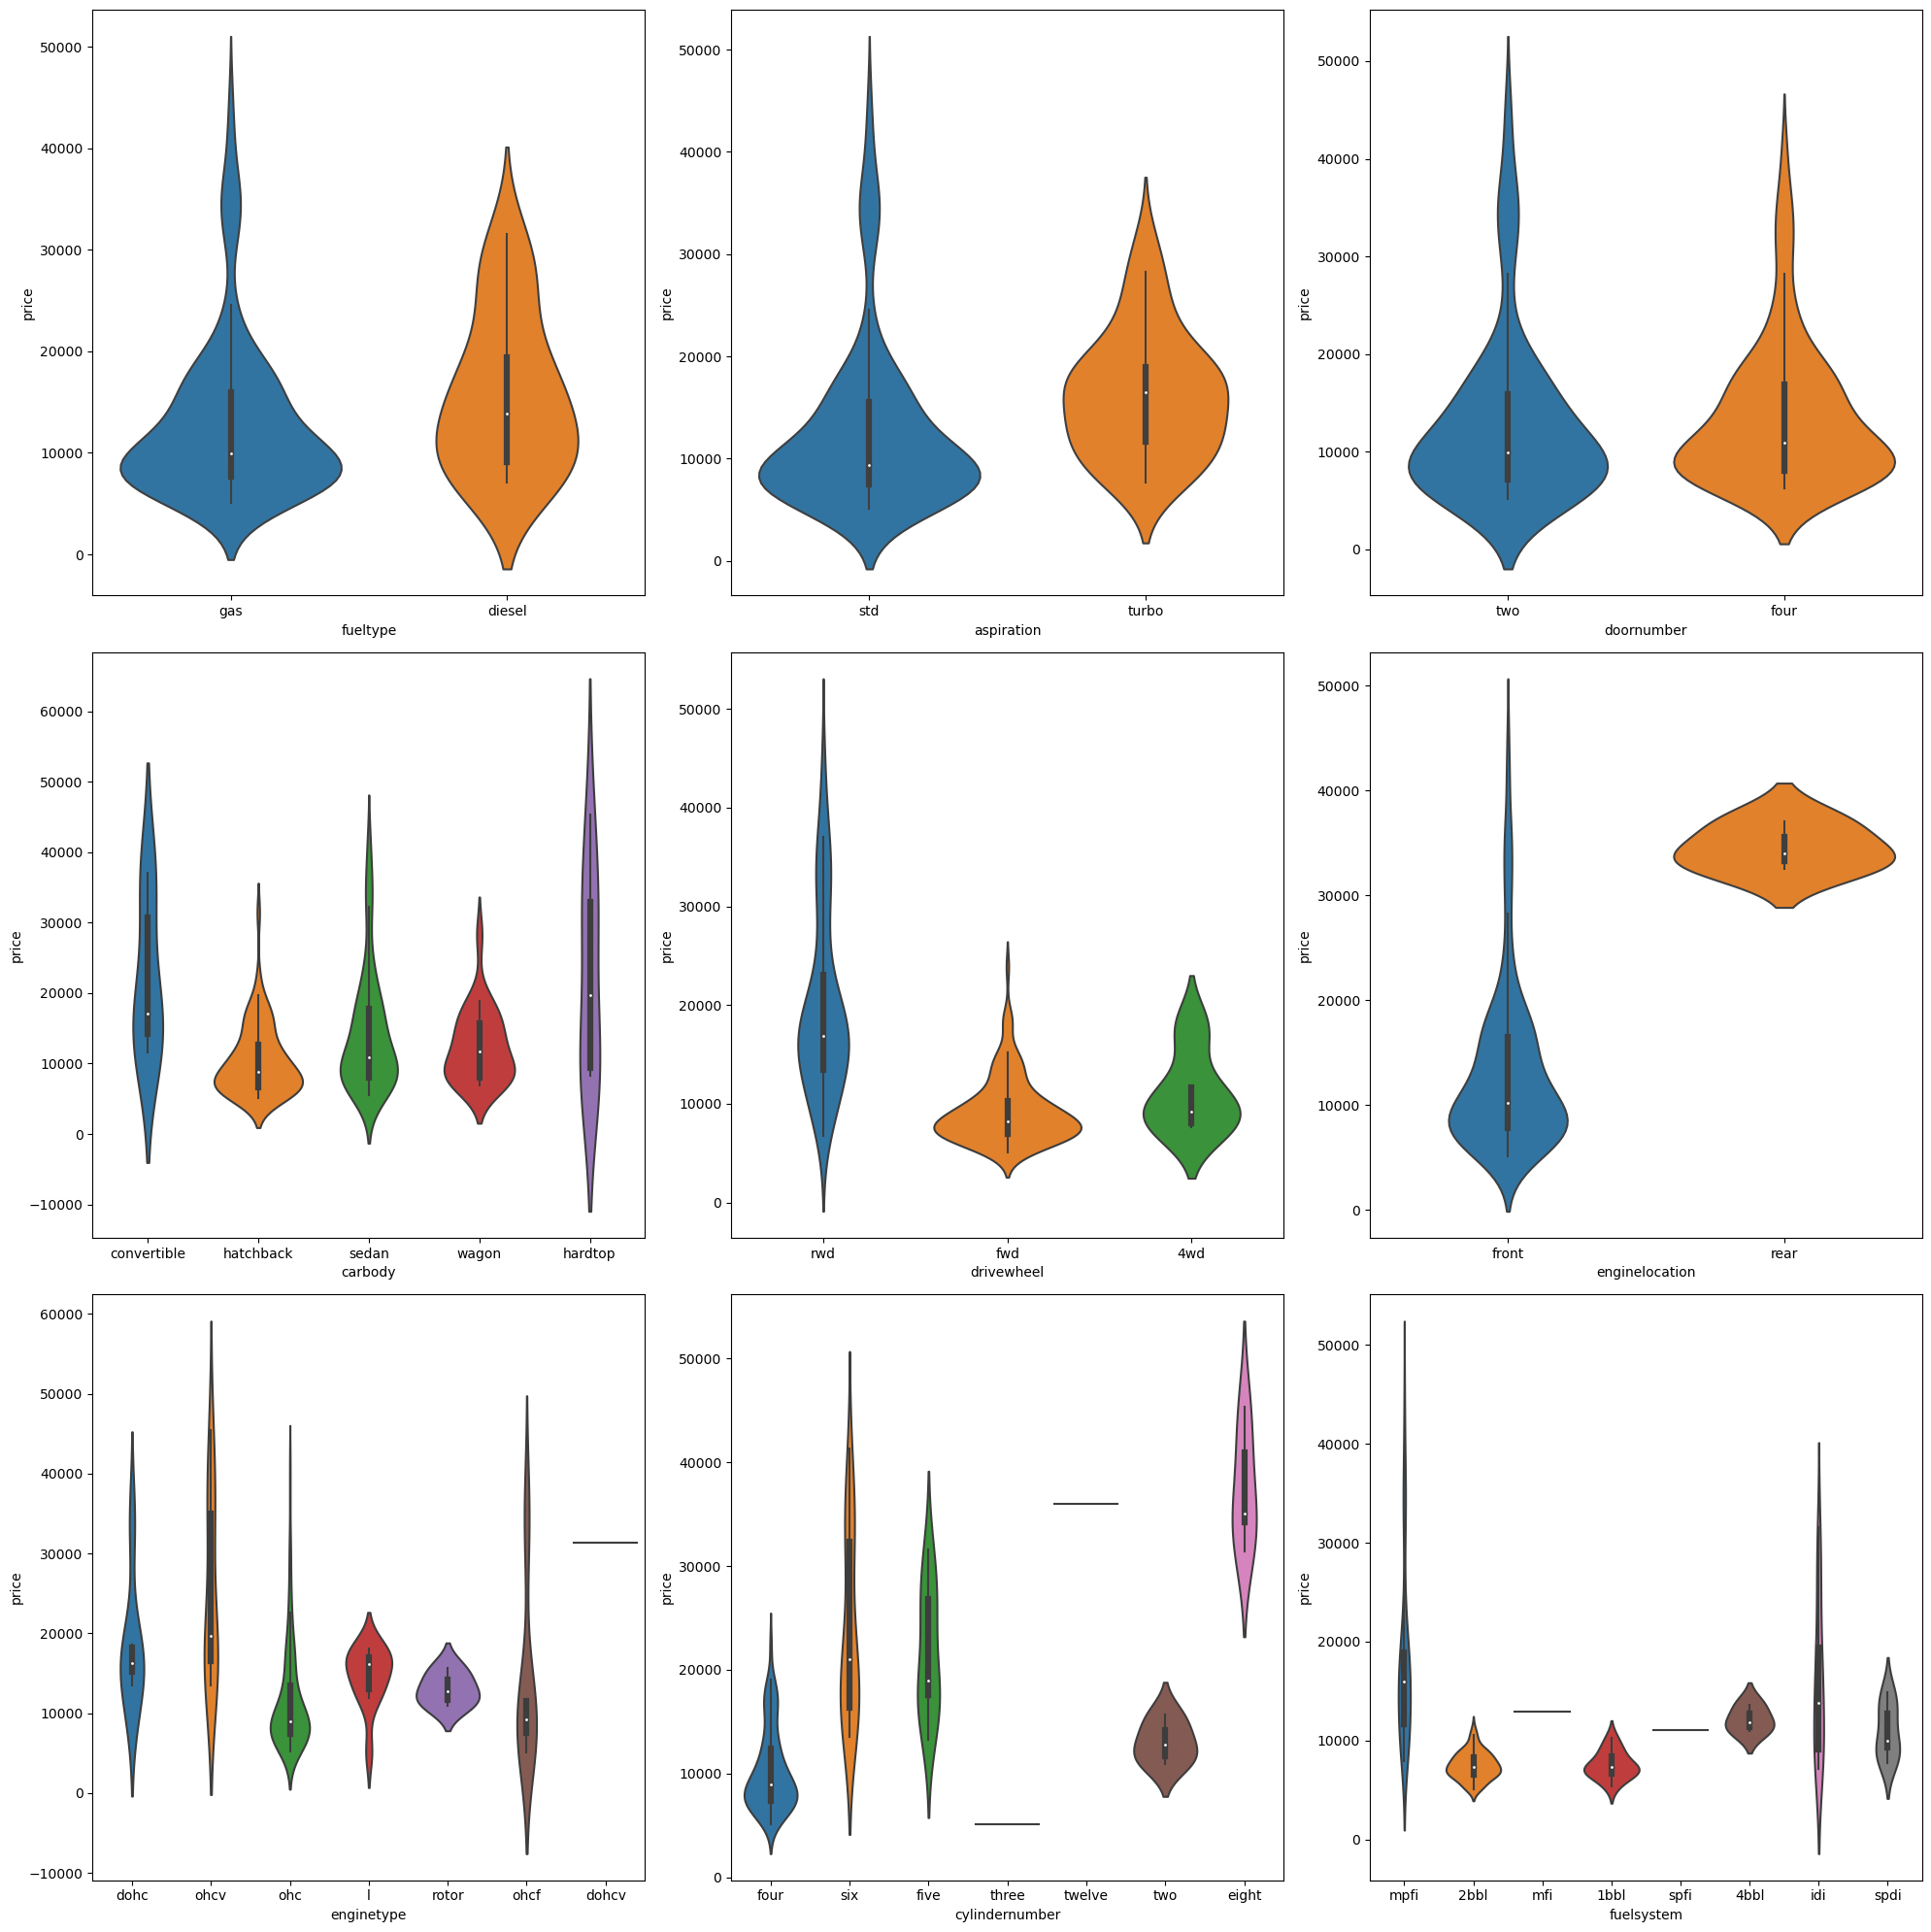

In [11]:
plt.figure(figsize=(20,20))
for i, j in enumerate(cat_col):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x = j, y = 'price', data = car)
plt.tight_layout()

In [12]:
for i in car[cat_col]:
    print(i)
    print(car[i].unique())

fueltype
['gas' 'diesel']
aspiration
['std' 'turbo']
doornumber
['two' 'four']
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel
['rwd' 'fwd' '4wd']
enginelocation
['front' 'rear']
enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


# One-Hot Encoding
eature 2 or 3 labels to avoid problems due to increased dimensionality. We will use Ordinal Encoder on the remaining features

In [13]:
car = pd.get_dummies(columns = ['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation'],
                            data = car, drop_first = True)
car.head()

,carbody,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
car_ID,,,,,,,,,,,,,,,,,,,,
1,convertible,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,1,0,1,0,1,0
2,convertible,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,1,0,1,0,1,0
3,hatchback,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,1,0,1,0,1,0
4,sedan,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,1,0,0,1,0,0
5,sedan,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,1,0,0,0,0,0


In [14]:
car.shape

(205, 20)

# Ordinal Encoding

In [15]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

encoder = OrdinalEncoder()
for i in car.select_dtypes(include = 'object').columns:
    car[i] = encoder.fit_transform(car[[i]])
car.head()

,carbody,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
car_ID,,,,,,,,,,,,,,,,,,,,
1,0.0,88.6,168.8,64.1,2548,0.0,2.0,130,5.0,3.47,111,21,27,13495.0,1,0,1,0,1,0
2,0.0,88.6,168.8,64.1,2548,0.0,2.0,130,5.0,3.47,111,21,27,16500.0,1,0,1,0,1,0
3,2.0,94.5,171.2,65.5,2823,5.0,3.0,152,5.0,2.68,154,19,26,16500.0,1,0,1,0,1,0
4,3.0,99.8,176.6,66.2,2337,3.0,2.0,109,5.0,3.19,102,24,30,13950.0,1,0,0,1,0,0
5,3.0,99.4,176.6,66.4,2824,3.0,1.0,136,5.0,3.19,115,18,22,17450.0,1,0,0,0,0,0


# Preparing data for model building

In [16]:
from sklearn.model_selection import train_test_split

X = car.drop('price', axis = 1)
y = car['price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [17]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(143, 19) (143,) (62, 19) (62,)


# OLS Regresion

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
mse = mean_absolute_error(y_test, lr_pred)
print(f'Mean Absolute Error = {mse:.2f}')
rmse = mean_squared_error(y_test, lr_pred, squared = False)
print(f'Root Mean Squared Error = {rmse:.2f}')
r2 = r2_score(y_test, lr_pred)
print(f'R-Squared Score = {r2*100:.2f} %')

Mean Absolute Error = 1992.23
Root Mean Squared Error = 2729.09
R-Squared Score = 78.63 %


# Visualizing OLS output

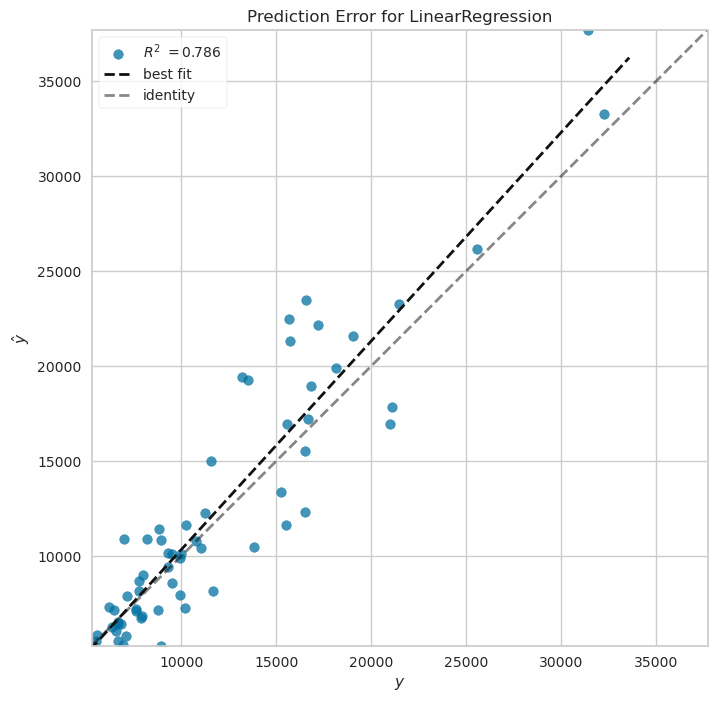

In [19]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

plt.figure(figsize=(20,8))
pred_error = PredictionError(lr_model)

pred_error.fit(X_train, y_train)  
pred_error.score(X_test, y_test)
pred_error.show();

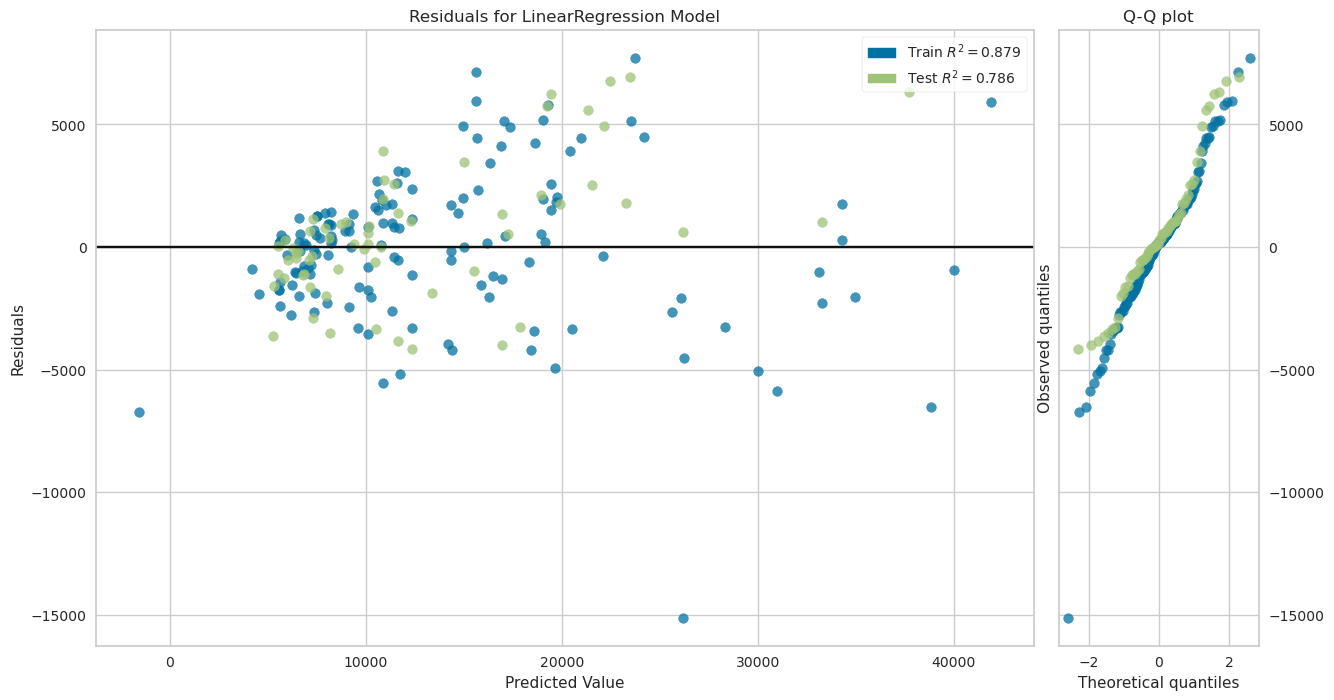

In [20]:
plt.figure(figsize=(15, 8))
res_plot = ResidualsPlot(lr_model, hist = False, qqplot = True)

res_plot.fit(X_train, y_train)  
res_plot.score(X_test, y_test)
res_plot.show();